In [1]:
import read_data as imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
symbols = ['XLP','XLY','XLE','XLF','XLV','XLI','XLK','XLU']
years = [x for x in range(2000,2019)]
hist_data = imp.organizarTodo(symbols,years)

Assets = pd.DataFrame()
Log_Assets = pd.DataFrame()

for asset,df in hist_data.items():
    Assets[asset] = df['Close']
    Log_Assets[asset] = np.log(df['Close']/df['Close'].shift(1))

In [3]:
np.random.seed(42)
num_ports = 100000
all_weights = np.zeros((num_ports, len(Assets.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(len(Assets.columns)))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (Log_Assets.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(Log_Assets.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [4]:
print('Max sharpe ratio in the array: {}'.format(sharpe_arr.max()))
print('Its location in the array: {}'.format(sharpe_arr.argmax()))

Max sharpe ratio in the array: 0.3104390548566547
Its location in the array: 4203


In [5]:
print(all_weights[sharpe_arr.argmax(),:])

max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

[0.15114278 0.35054804 0.01587848 0.01685097 0.34554915 0.04939977
 0.00084258 0.06978822]


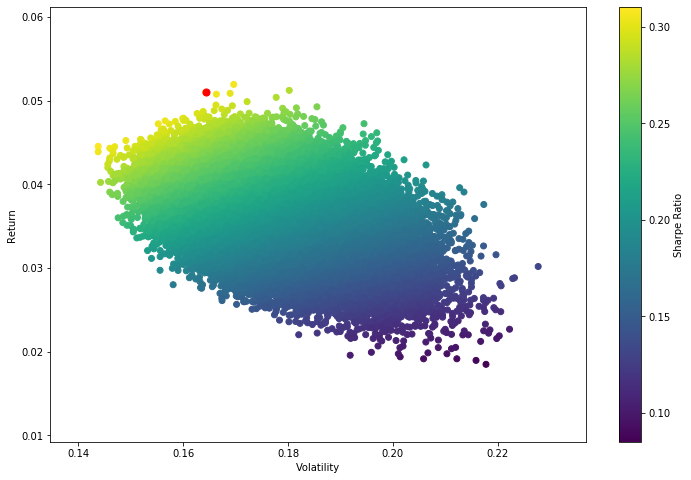

In [6]:

plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()